In [40]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io

import sys
sys.path.append('../../j1c/quality/')

from skimage.measure import label
from graphing import graph_performance

In [52]:
def get_unique_overlap(foreground, background, i):
    '''
    Calculates the number of unique background labels in the foreground at i
    Does not count background label of 0
    '''

    #This runs about 4 times faster than np.unique()
    overlaps = np.multiply((foreground == i), background)
    bins = np.zeros(np.max(overlaps) + 1, dtype=int)
    bins[overlaps.ravel()] = 1
    uniques = np.nonzero(bins)[0]

    num_unique = len(uniques)

    #0 is background label
    #should not count as a detection if
    #the prediction overlaps with the background
    if 0 in uniques:
        num_unique -= 1

    return num_unique


def compute_overlap_array(predictions, gt):

    predictionLabels = label(predictions)
    maxPredictionLabel = np.max(predictionLabels)

    gtLabels = label(gt)
    maxGtLabel = np.max(gtLabels)

    #first, look at how many unique predictions
    #overlap with a single gt synapse
    predictionPerGt = [get_unique_overlap(gtLabels, predictionLabels, i)\
                       for i in range(1, maxGtLabel + 1)]


    #next, look at how many unique synapses overlap
    #with a single synapse prediction
    gtPerPrediction = [get_unique_overlap(predictionLabels, gtLabels, i)\
                       for i in range(1, maxPredictionLabel + 1)]

    return {'predictionPerGt': predictionPerGt,
'gtPerPrediction': gtPerPrediction}

In [5]:
annotation_collman = io.imread('../data/annotation.tiff')

In [28]:
annotation_drishti = io.imread('../data/0-6306_0-4518_0-27.tif')

In [47]:
annotation_sharmini = np.load('../../sharminiprem/Annotations /annotation_sharmini.npz')

In [48]:
annotation_sharmini.files

['annotation_sharmini']

In [50]:
annotation_sharmini = annotation_sharmini['annotation_sharmini']

In [64]:
overlaps = compute_overlap_array(annotation_drishti[10:20, 1000:3000, 1000:3000], 
                                 annotation_collman[10:20, 1000:3000, 1000:3000])

In [65]:
overlaps_drishti_sharmini = compute_overlap_array(annotation_sharmini[10:20, 1000:3000, 1000:3000],
                                                 annotation_drishti[10:20, 1000:3000, 1000:3000])

In [66]:
overlaps_sharmini = compute_overlap_array(annotation_sharmini[10:20, 1000:3000, 1000:3000], 
                                         annotation_collman[10:20, 1000:3000, 1000:3000])

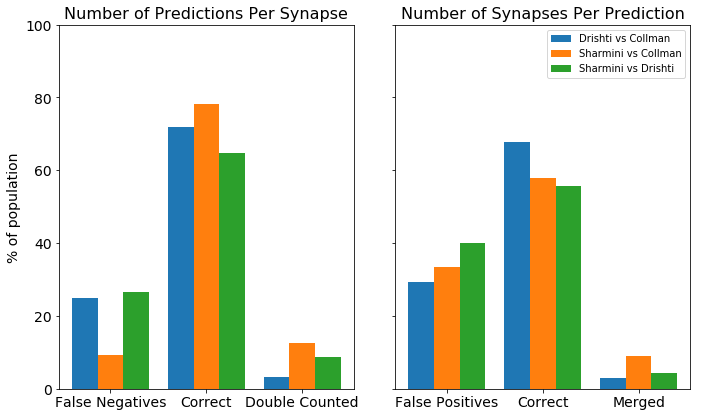

In [67]:
graph_performance([overlaps, overlaps_sharmini, overlaps_drishti_sharmini], labels=['Drishti vs Collman', 
                                                                                    'Sharmini vs Collman', 
                                                                                    'Sharmini vs Drishti'])

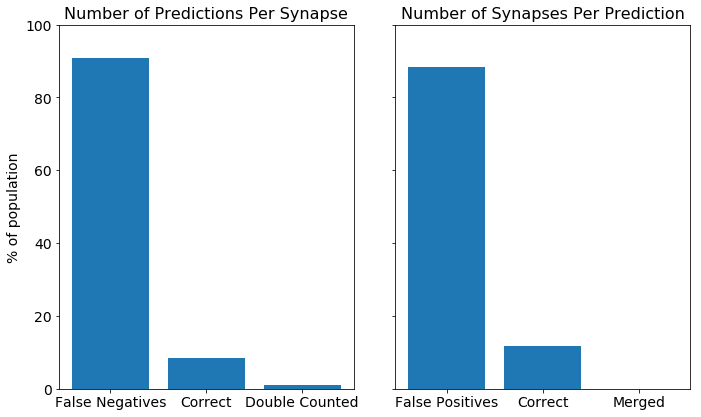

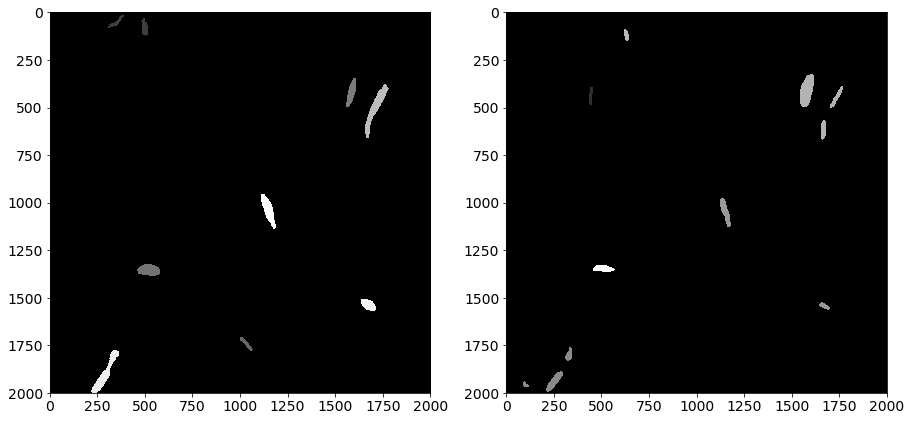

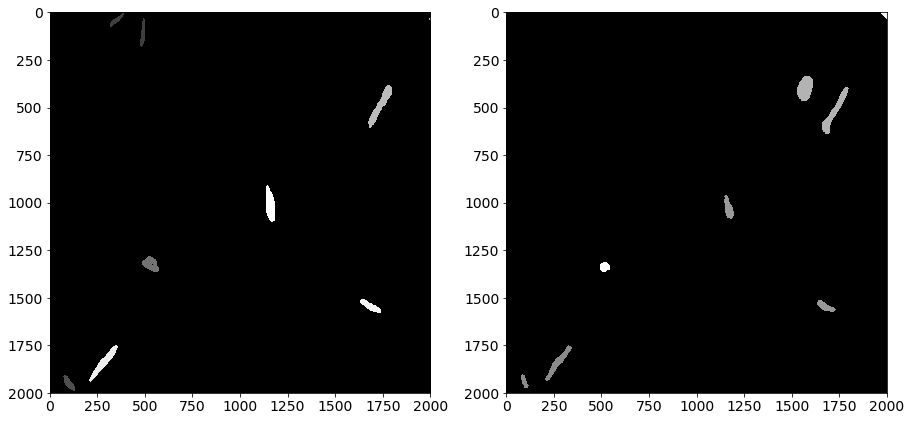

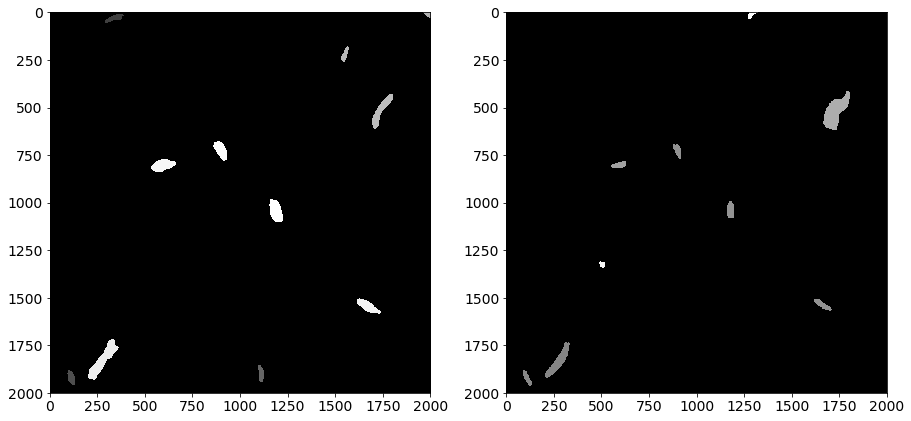

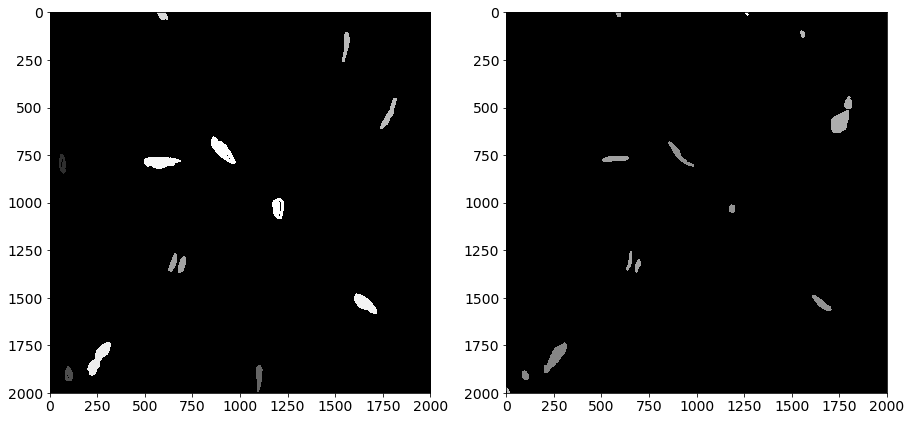

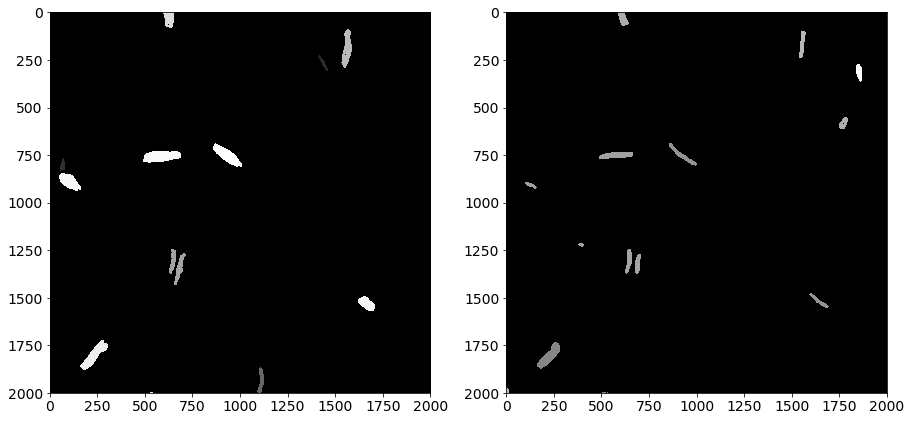

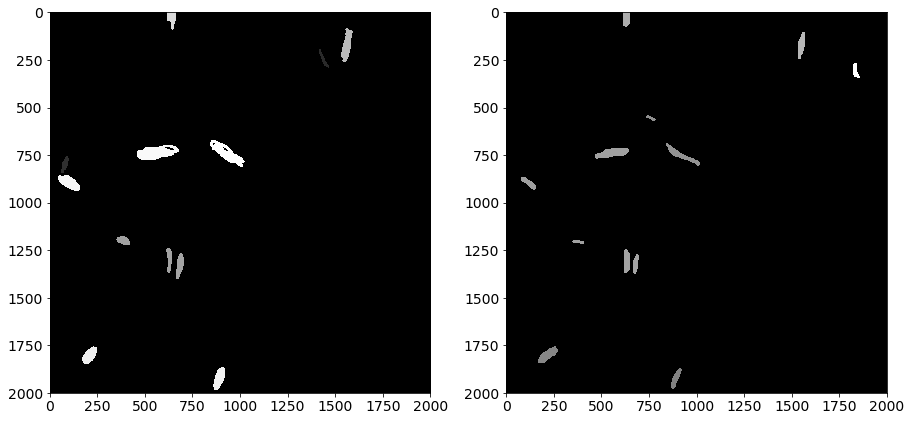

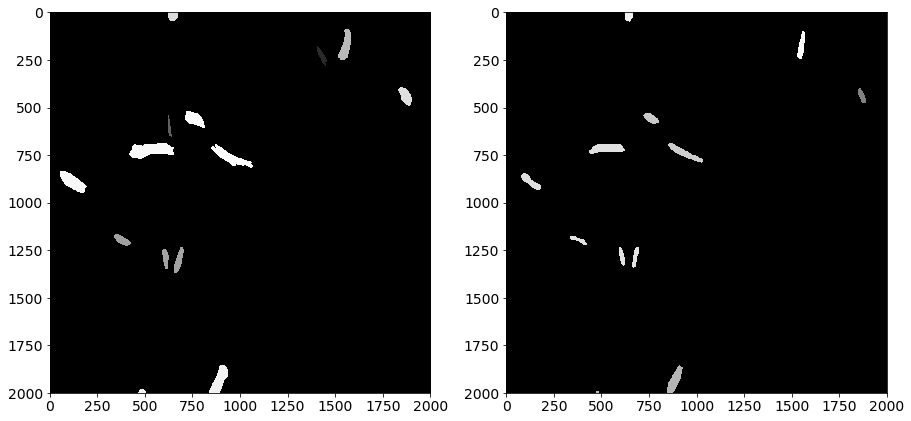

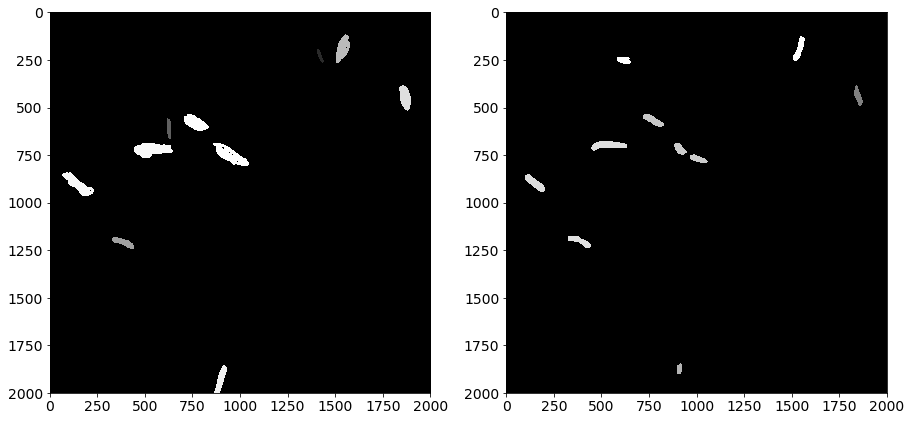

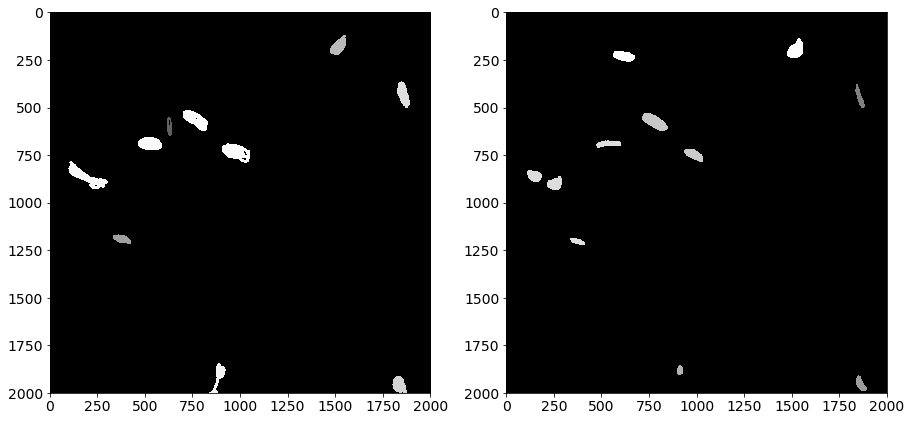

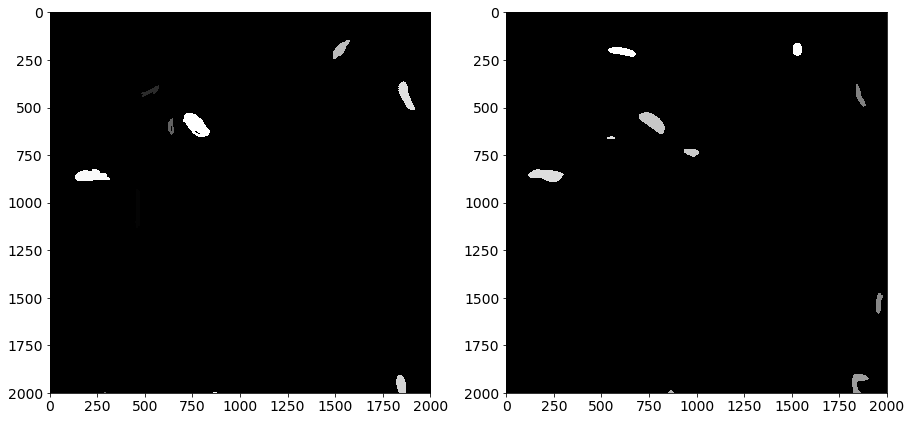

In [37]:
for i in range(10):
    plt.figure(figsize=(15,8))

    plt.subplot(121)
    plt.imshow(drishti[i], cmap='gray')
    
    plt.subplot(122)
    plt.imshow(collman[i], cmap='gray')
    
    plt.show()

In [68]:
np.savez_compressed('annotation_drishti', annotation_drishti=annotation_drishti)